# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.524  1  0.794 0.374 0.004   
                             age        0.105  1  0.159 0.690 0.001   
                             Kiel       2.443  1  3.698 0.056 0.019   
                             Magdeburg  5.612  1  8.493 0.004 0.043   
                             Sweden     9.070  1 13.727 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.009  1  0.011 0.917 0.000   
                             age        1.831  1  2.154 0.144 0.011   
                             Kiel       0.140  1  0.165 0.685 0.001   
                             Magdeburg  1.787  1  2.103 0.149 0.011   
                             Sweden    24.578  1 28.925 0.000 0.132   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.427  0.538    False  
                             age               0.161  0.800    False  
                             Kiel              1.252  0.133    False  
                             Magdeburg         2.399  0.016     True  
                             Sweden            3.558  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.038  0.955    False  
                             age               0.842  0.273    False  
                             Kiel              0.164  0.797    False  
                             Magdeburg         0.828  0.280    False  
                             Sweden            6.661  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.750  1  4.496 0.035 0.023   
                             age        0.002  1  0.009 0.923 0.000   
                             Kiel       0.399  1  2.389 0.124 0.012   
                             Magdeburg  1.057  1  6.331 0.013 0.032   
                             Sweden     2.622  1 15.714 0.000 0.076   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.836  1  1.444 0.231 0.008   
                             age        2.337  1  1.190 0.277 0.006   
                             Kiel       6.407  1  3.262 0.072 0.017   
                             Magdeburg 12.813  1  6.523 0.011 0.033   
                             Sweden     1.846  1  0.940 0.334 0.005   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.453  0.086    False  
                             age               0.035  0.954    False  
                             Kiel              0.907  0.230    False  
                             Magdeburg         1.897  0.037     True  
                             Sweden            3.983  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.636  0.373    False  
                             age               0.558  0.424    False  
                             Kiel              1.140  0.151    False  
                             Magdeburg         1.942  0.035     True  
                             Sweden            0.477  0.485    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.374         0.427  0.538    False   
                             age       0.690         0.161  0.800    False   
                             Kiel      0.056         1.252  0.133    False   
                             Magdeburg 0.004         2.399  0.016     True   
                             Sweden    0.000         3.558  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.917         0.038  0.955    False   
                             age       0.144         0.842  0.273    False   
                             Kiel      0.685         0.164  0.797    False   
                             Magdeburg 0.149         0.828  0.280    False   
                             Sweden    0.000         6.661  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.035         1.453  0.086    False  
                             age       0.923         0.035  0.954    False  
                             Kiel      0.124         0.907  0.230    False  
                             Magdeburg 0.013         1.897  0.037     True  
                             Sweden    0.000         3.983  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.231         0.636  0.373    False  
                             age       0.277         0.558  0.424    False  
                             Kiel      0.072         1.140  0.151    False  
                             Magdeburg 0.011         1.942  0.035     True  
                             Sweden    0.334         0.477  0.485    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.480     0.337     0.245         2.743     0.312
std       0.303         5.373     0.331     0.299         5.179     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.334     0.015     0.002         0.355     0.008
50%       0.120         0.921     0.240     0.089         1.052     0.177
75%       0.464         2.421     0.618     0.442         2.708     0.589
max       1.000       147.210     1.000     0.999        84.227     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.374         0.427   
A0A024R0T9;K7ER74;P02655                           AD     0.045         1.346   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.070         1.155   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.499         0.302   
A0A075B6H7                                         AD     0.165         0.782   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.053         1.275   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.297         0.527   
S4R3U6                                             AD     0.917         0.038   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.538    False   
A0A024R0T9;K7ER74;P02655                           AD      0.113    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.159    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.650    False   
A0A075B6H7                                         AD      0.302    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.128    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.458    False   
S4R3U6                                             AD      0.955    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.035         1.453   
A0A024R0T9;K7ER74;P02655                           AD     0.026         1.587   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.342         0.466   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.314         0.503   
A0A075B6H7                                         AD     0.005         2.323   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.027         1.562   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.685         0.165   
S4R3U6                                             AD     0.231         0.636   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.086    False  
A0A024R0T9;K7ER74;P02655                           AD      0.067    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.494    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.465    False  
A0A075B6H7                                         AD      0.017     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.401     0.338     0.248         1.491     0.321
std       0.291         1.642     0.317     0.288         1.766     0.315
min       0.000         0.000     0.000     0.000         0.003     0.000
25%       0.012         0.360     0.040     0.010         0.350     0.030
50%       0.126         0.899     0.249     0.110         0.960     0.210
75%       0.437         1.912     0.597     0.447         2.021     0.593
max       0.999        23.831     1.000     0.994        24.050     0.996

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1035,986


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.374         0.427  0.538   
A0A024R0T9;K7ER74;P02655                           0.045         1.346  0.113   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.070         1.155  0.159   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.499         0.302  0.650   
A0A075B6H7                                         0.165         0.782  0.302   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.053         1.275  0.128   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.297         0.527  0.458   
S4R3U6                                             0.917         0.038  0.955   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.035   
A0A024R0T9;K7ER74;P02655                              False 0.026   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.342   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.314   
A0A075B6H7                                            False 0.005   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.027   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.685   
S4R3U6                                                False 0.231   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.453  0.086   
A0A024R0T9;K7ER74;P02655                                   1.587  0.067   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.466  0.494   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.503  0.465   
A0A075B6H7                                                 2.323  0.017   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.562  0.070   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.169   
Q9Y6Y9                                                     0.165  0.788   
S4R3U6                                                     0.636  0.373   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    960
PI (yes) - QRILC (yes)   360
PI (no)  - QRILC (yes)    75
PI (yes) - QRILC (no)     26
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6H7                                         0.165         0.782  0.302   
A0A075B6I0                                         0.020         1.698  0.059   
A0A087WWT2;Q9NPD7                                  0.019         1.718  0.057   
A0A087WXB8;Q9Y274                                  0.011         1.977  0.035   
A0A087X0M8                                         0.019         1.720  0.057   
...                                                  ...           ...    ...   
Q9P0K9                                             0.022         1.654  0.064   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.010         2.021  0.032   
Q9UKB5                                             0.007         2.186  0.024   
Q9UP79                                             0.237         0.625  0.392   
Q9UQ52                                             0.042         1.380  0.106   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6H7                                            False 0.005   
A0A075B6I0                                            False 0.002   
A0A087WWT2;Q9NPD7                                     False 0.005   
A0A087WXB8;Q9Y274                                      True 0.024   
A0A087X0M8                                            False 0.003   
...                                                     ...   ...   
Q9P0K9                                                False 0.009   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.020   
Q9UKB5                                                 True 0.136   
Q9UP79                                                False 0.015   
Q9UQ52                                                False 0.005   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6H7                                                 2.323  0.017   
A0A075B6I0                                                 2.661  0.009   
A0A087WWT2;Q9NPD7                                          2.279  0.018   
A0A087WXB8;Q9Y274                                          1.618  0.063   
A0A087X0M8                                                 2.533  0.011   
...                                                          ...    ...   
Q9P0K9                                                     2.038  0.029   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         1.690  0.055   
Q9UKB5                                                     0.865  0.247   
Q9UP79                                                     1.831  0.042   
Q9UQ52                                                     2.273  0.018   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6H7                                             True        91  
A0A075B6I0                                             True       194  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087WXB8;Q9Y274                                     False        89  
A0A087X0M8                                             True       189  
...                                                     ...       ...  
Q9P0K9                                                 True       192  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9UKB5                                                False       148  
Q9UP79                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.538,0.086,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.113,0.067,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.159,0.494,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.650,0.465,196,PI (no) - QRILC (no)
A0A075B6H7,0.302,0.017,91,PI (no) - QRILC (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.128,0.070,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.169,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
J3QQR8;J3QQX6;J3QRQ1;J3QRT5;P13598,0.799,0.044,155,PI (no) - QRILC (yes),0.755
P09960;P09960-4,0.023,0.601,152,PI (yes) - QRILC (no),0.578
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.587,0.032,86,PI (no) - QRILC (yes),0.555
G3V295;G3V3I1;G3V5Z7;P60900,0.540,0.003,95,PI (no) - QRILC (yes),0.537
Q08174-2,0.493,0.028,194,PI (no) - QRILC (yes),0.464
...,...,...,...,...,...
D6RCE0;E9PD25;O43897;O43897-2,0.063,0.038,180,PI (no) - QRILC (yes),0.025
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UIB8-6,0.032,0.055,115,PI (yes) - QRILC (no),0.023
P26572,0.062,0.047,194,PI (no) - QRILC (yes),0.015


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


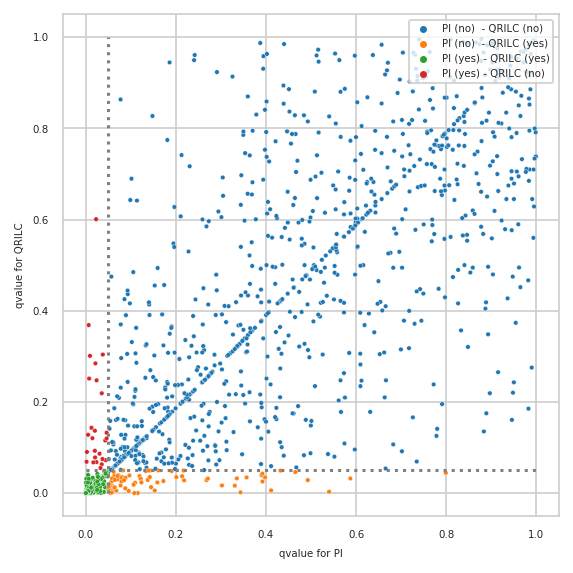

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


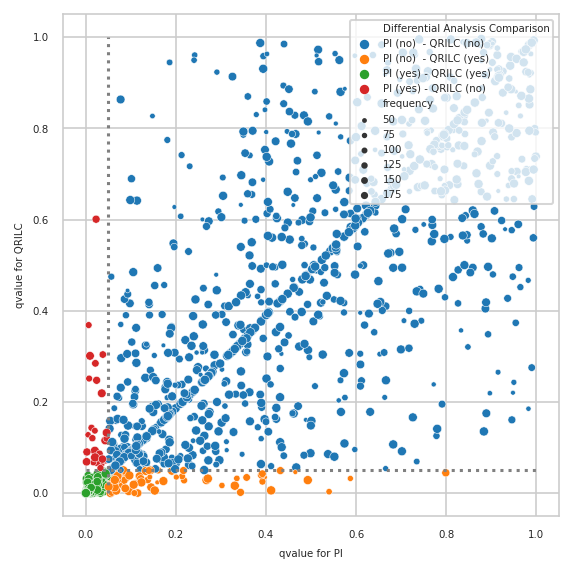

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out